In [12]:
from google.colab import files
uploaded = files.upload()

Saving customer_purchase_data.csv to customer_purchase_data.csv


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('customer_purchase_data.csv')

In [17]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [18]:
data.info()
#there are no null values in this data
#there are total 1500 rows in this data
#there are 8 columns
#there are 3 categorical columns ('Gender', 'ProductCategory', 'LoyaltyProgram')
#rest all columns are continous columns
#'PurchaseStatus' is are target column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


<Axes: xlabel='PurchaseStatus', ylabel='LoyaltyProgram'>

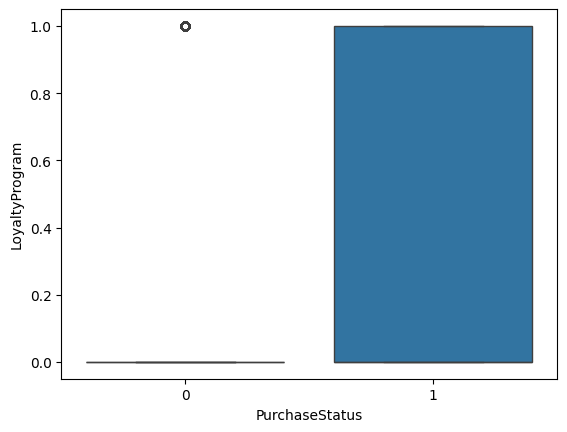

In [21]:
sns.boxplot(data=data, y="LoyaltyProgram", x="PurchaseStatus")


<Axes: xlabel='ProductCategory', ylabel='AnnualIncome'>

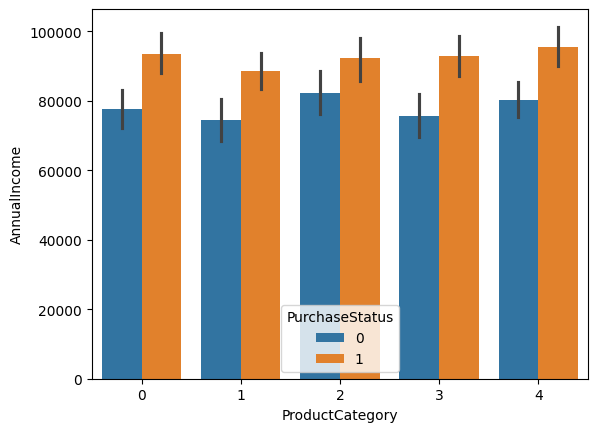

In [22]:
sns.barplot(data=data, x="ProductCategory", y="AnnualIncome", hue="PurchaseStatus")

In [23]:
target_column = 'PurchaseStatus'
X = data.drop(columns=[target_column])
y = data[target_column]

In [24]:
# Encoding categorical columns
label_encoders = {}
for col in ['Gender', 'ProductCategory', 'LoyaltyProgram']:  # Adjust based on your column names
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
#precision=82% were correctly identified as non-purchases.
#recall=the model successfully identified 92% as non-purchases.
#Conclusion: The model is very reliable at identifying non-purchasing customers, with a high recall rate.

Logistic Regression:
Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.72      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.84      0.84      0.83       300



In [28]:
# Model 2: Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree:
Accuracy: 0.8966666666666666
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       172
           1       0.91      0.84      0.87       128

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.90      0.90       300



In [29]:
# Model 3: Random Forest Classifier
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
#random forest classifier has given out the best of the accuracy in the pridiction of the customer purchase

Random Forest:
Accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.90      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



In [30]:
# Confusion Matrix for each model
print("Confusion Matrices:")
print("Logistic Regression:", confusion_matrix(y_test, y_pred_logistic))
#True Negatives (159): Correctly predicted 159 non-purchase instances.
#False Positives (13): Incorrectly predicted 13 non-purchases as purchases.
#False Negatives (36): Missed 36 actual purchases, predicting them as non-purchases.
#True Positives (92): Correctly predicted 92 purchases.


Confusion Matrices:
Logistic Regression: [[159  13]
 [ 36  92]]


In [31]:
print("Decision Tree:", confusion_matrix(y_test, y_pred_tree))
#True Negatives (162): Correctly identified 162 non-purchase instances.
#False Positives (10): Incorrectly predicted 10 non-purchases as purchases.
#False Negatives (21): Missed 21 actual purchases, predicting them as non-purchases.
#True Positives (107): Correctly identified 107 purchases


Decision Tree: [[162  10]
 [ 21 107]]


In [32]:
print("Random Forest:", confusion_matrix(y_test, y_pred_forest))
#True Negatives (171): Accurately identified 171 non-purchases.
#False Positives (1): Made only 1 mistake by predicting a non-purchase as a purchase.
#False Negatives (13): Missed 13 actual purchases.
#True Positives (115): Correctly identified 115 purchases.

Random Forest: [[171   1]
 [ 13 115]]
